In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('university_admissions.csv')
df

rating  CGPA  admitted
0          4  9.88      True
1          4  8.30      True
2          3  6.59     False
3          4  8.96      True
4          1  5.74      True
...      ...   ...       ...
1535       5  8.89     False
1536       3  7.05     False
1537       3  7.68      True
1538       2  6.05     False
1539       3  7.14     False

[1540 rows x 3 columns]

In [3]:
# Shuffle Data
df = df.sample(frac=1)

In [4]:
df.shape

(1540, 3)

In [5]:
# Functions

def sigmoid(z):
    
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid


def cost_function(X, y, w, b):
    
    z = X.dot(w) + b
    
    J = -(1/len(y))*np.sum((y*np.log(sigmoid(z)) + ((1 - y) * np.log(1 - sigmoid(z)))))
    
    return J

def gradient_descent(X, y, w, b, alpha, epochs):
    
    cost_history = []
    m = len(y)
    
    for epoch in range(epochs):
        
        z = X.dot(w) + b 
        loss = sigmoid(z) - y
        
        dw = X.T.dot(loss) / m
        db = np.sum(loss) / m
        
        w -= alpha * dw
        b -= alpha * db
        
        cost = cost_function(X, y, w, b)
        cost_history.append(cost)
        
        if (epoch % 1000 == 0):
            print("Epoch: ", epoch)
            print("Cost: ", cost)
        
    return w, b, cost_history

def predict(X, w, b, threshold=0.5):
      
    predictions = X.dot(w) + b
    
    y_pred = sigmoid(predictions)
    
    y_pred_class = [1 if i > threshold else 0 for i in y_pred]
    
    return np.array(y_pred_class)

def accuracy(y_test, y_pred_class):
    
    accuracy = np.sum(y_test == y_pred_class) / len(y_test)
    
    return accuracy     

In [6]:
# Slice
df_train = df.iloc[0:1232, :]
df_test = df.iloc[1232:, :]

In [7]:
# Split
X_train = df_train.iloc[:, :-1]
X_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

In [8]:
X_train.shape, y_train.shape

((1232, 2), (1232,))

In [9]:
# Initialization
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.01
epochs = 10000

In [10]:
w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, epochs)

Epoch:  0
Cost:  0.6930275710315525
Epoch:  1000
Cost:  0.6457631221074839
Epoch:  2000
Cost:  0.6281404693137139
Epoch:  3000
Cost:  0.6131753383036925
Epoch:  4000
Cost:  0.5995964808653005
Epoch:  5000
Cost:  0.5872020510590089
Epoch:  6000
Cost:  0.5758576155195193
Epoch:  7000
Cost:  0.5654470454159286
Epoch:  8000
Cost:  0.5558686290719597
Epoch:  9000
Cost:  0.5470333294624622


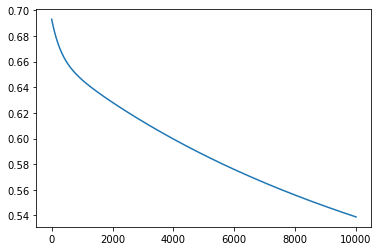

In [11]:
# Plot Cost
plt.plot(cost_history)

In [12]:
predictions = predict(X_test, w, b)

print("Logistic Regression Accuracy:", accuracy(y_test, predictions))

Logistic Regression Accuracy: 0.724025974025974
